In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()


In [2]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd
import tensorflow as tf
#from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
#tf.set_random_seed(42)
tf.random.set_seed(42)
print(tf.__version__)


2.1.0


Using TensorFlow backend.


In [3]:
import os
comando = "PowerShell -Command \"Add-Type -AssemblyName System.Speech; (New-Object System.Speech.Synthesis.SpeechSynthesizer).Speak('trabajo terminado');\" "

In [4]:
m = 23
minimo = 0
maximo = 1177

## Lectura de datos

In [5]:
#nombre = '1_temperature'
#nombre = '2_temperature_subsampled'
#nombre = '3_passengers'
nombre = '4_irradiance'
#nombre = '5_irradiance_subsampled'
#nombre = '6_sunspots'
#nombre = '7_distribution_subsampled_norm'
#nombre = '8_active_power'
matrizDiseño = pd.read_csv('MatDis/'+nombre+'_Matrix.csv')

matrizDiseño.shape

(1551, 24)

## División y estandarización de datos

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, test_siz=0.3, val_size=0.2)

## Ruido (en las pruebas que sea necesario)

In [7]:
#X_train, y_train = trainNoise('MatDis/'+nombre+'_All.csv',X_train.copy(), y_train.copy(), SNR_dB=35, NUMREP=7)

## MLP

In [8]:
neuronas = [512,1024, 2048, 2048, 1024, 512]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'relu', 'relu', 'sigmoid'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m)

Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 23)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               12288     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               

## Entrenamiento

In [9]:
%%time
history = fitMLP(model, X_train, y_train, X_val, y_val, X_test, y_test, epoc=100, patien=-1)
os.system(comando)

Train on 868 samples, validate on 217 samples
Epoch 1/100
868/868 [==============================] - 1s 729us/sample - loss: 0.0654 - mae: 0.1472 - val_loss: 0.1875 - val_mae: 0.3725
Epoch 2/100
868/868 [==============================] - 0s 56us/sample - loss: 0.1834 - mae: 0.3661 - val_loss: 0.0671 - val_mae: 0.1499
Epoch 3/100
868/868 [==============================] - 0s 54us/sample - loss: 0.0546 - mae: 0.1385 - val_loss: 0.0675 - val_mae: 0.1444
Epoch 4/100
868/868 [==============================] - 0s 55us/sample - loss: 0.0546 - mae: 0.1326 - val_loss: 0.0573 - val_mae: 0.1412
Epoch 5/100
868/868 [==============================] - 0s 52us/sample - loss: 0.0463 - mae: 0.1308 - val_loss: 0.0419 - val_mae: 0.1377
Epoch 6/100
868/868 [==============================] - 0s 51us/sample - loss: 0.0341 - mae: 0.1292 - val_loss: 0.0278 - val_mae: 0.1353
Epoch 7/100
868/868 [==============================] - 0s 53us/sample - loss: 0.0248 - mae: 0.1298 - val_loss: 0.0226 - val_mae: 0.1074
E

Epoch 61/100
868/868 [==============================] - 0s 48us/sample - loss: 0.0072 - mae: 0.0444 - val_loss: 0.0207 - val_mae: 0.0718
Epoch 62/100
868/868 [==============================] - 0s 47us/sample - loss: 0.0072 - mae: 0.0445 - val_loss: 0.0204 - val_mae: 0.0698
Epoch 63/100
868/868 [==============================] - 0s 48us/sample - loss: 0.0065 - mae: 0.0417 - val_loss: 0.0214 - val_mae: 0.0697
Epoch 64/100
868/868 [==============================] - 0s 48us/sample - loss: 0.0070 - mae: 0.0433 - val_loss: 0.0206 - val_mae: 0.0703
Epoch 65/100
868/868 [==============================] - 0s 47us/sample - loss: 0.0064 - mae: 0.0411 - val_loss: 0.0208 - val_mae: 0.0708
Epoch 66/100
868/868 [==============================] - 0s 48us/sample - loss: 0.0065 - mae: 0.0414 - val_loss: 0.0215 - val_mae: 0.0697
Epoch 67/100
868/868 [==============================] - 0s 47us/sample - loss: 0.0066 - mae: 0.0421 - val_loss: 0.0207 - val_mae: 0.0694
Epoch 68/100
868/868 [===================

0

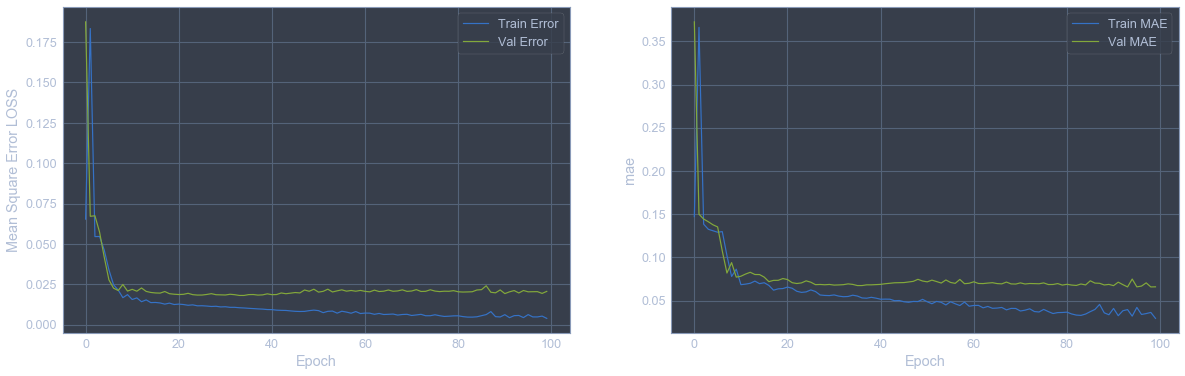

In [10]:
plotHistory(history)

## Predicción

In [11]:
y_predic= model.predict(X_test)

scaler = MinMaxScaler(feature_range=(minimo, maximo))
scaler.fit(y_test)

y_p = scaler.transform(y_predic)
y_t = scaler.transform(y_test)

In [12]:
print("SMAPE: ",sMAPE(y_t, y_p))
#print("MAPE: ",mAPE(y_t, y_p))

SMAPE:  59.734513629352946


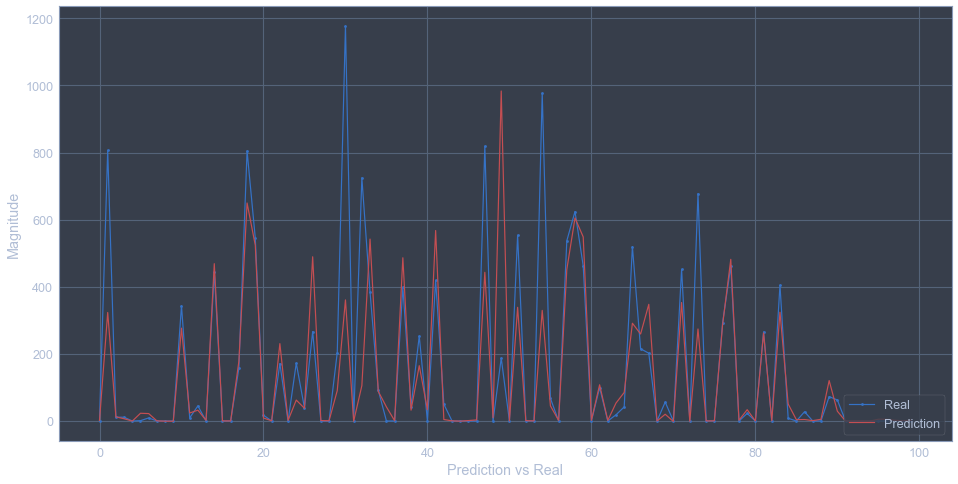

In [13]:
graphPrediction(y_t, y_p, samples=100)

In [14]:
model.save('modelo.h5')